In [70]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from collections import defaultdict

***Файл train.csv***

Присваеваем корректные типы данных, согласно заданию

>row_id: (int64) Идентификационный код строки

>timestamp: (int64) Время в миллисекундах между взаимодействием пользователя и завершением первого события от этого пользователя

>user_id: (int32) Идентификационный код пользователя

>content_id: (int16) Идентификационный код взаимодействия с пользователем

>content_type_id: (int8)  0, если событием был заданный пользователю вопрос, 1, если событием был просмотр лекции пользователем

>task_container_id: (int16) Идентификационный код пакета вопросов или лекций. Например, пользователь может просмотреть три вопроса подряд, прежде чем увидит пояснения к любому из них. Все эти три параметра будут иметь общий идентификатор task_container_id

>user_answer: (int8) Ответ пользователя на вопрос, если таковой имеется. Считайте -1 как null, для лекций

>answered_correctly: (int8) Если пользователь ответил правильно. Считайте -1 как null, для лекций

>prior_question_elapsed_time: (float32) Сколько времени потребовалось пользователю, чтобы ответить на предыдущий набор вопросов, игнорируя все лекции между ними. Это значение используется в одном наборе вопросов и равно нулю для первого набора вопросов пользователя или лекции. Обратите внимание, что это общее время, затраченное пользователем на решение всех вопросов из предыдущего пакета

>prior_question_had_explanation: (bool) Независимо от того, видел ли пользователь объяснение и правильные ответы после ответа на предыдущий набор вопросов, игнорируя любые лекции между ними. Это значение используется в одном наборе вопросов и равно нулю для первого набора вопросов пользователя или лекции. Как правило, первые несколько вопросов, которые видит пользователь, были частью вступительного диагностического теста, на который он не получил никакой обратной связи.

Считываем файл

Выводим иинформацию, описание и начало файла

In [62]:
dtypes_train_file = {
     "row_id": "int64",
    "timestamp": "int64",
    "user_id": "int32",
    "content_id": "int16",
    "content_type_id": "int8",
    "task_container_id": "int16",
    "user_answer": "int8",
    "answered_correctly": "int8",
    "prior_question_elapsed_time": "float32",
    "prior_question_had_explanation": "boolean"
}

train_file = pd.read_csv('data/train.csv', sep=',', dtype=dtypes_train_file)
train_file.info()
display(train_file.describe())
display(train_file.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int32  
 3   content_id                      int16  
 4   content_type_id                 int8   
 5   task_container_id               int16  
 6   user_answer                     int8   
 7   answered_correctly              int8   
 8   prior_question_elapsed_time     float32
 9   prior_question_had_explanation  boolean
dtypes: boolean(1), float32(1), int16(2), int32(1), int64(2), int8(3)
memory usage: 3.1 GB


,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
count,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,9.887879e+07
mean,5.061517e+07,7.703644e+09,1.076732e+09,5.219605e+03,1.935222e-02,9.040624e+02,1.376123e+00,6.251644e-01,2.542384e+04
std,2.922268e+07,1.159266e+10,6.197163e+08,3.866359e+03,1.377596e-01,1.358302e+03,1.192896e+00,5.225307e-01,1.994815e+04
min,0.000000e+00,0.000000e+00,1.150000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00
25%,2.530758e+07,5.243436e+08,5.408116e+08,2.063000e+03,0.000000e+00,1.040000e+02,0.000000e+00,0.000000e+00,1.600000e+04
50%,5.061517e+07,2.674234e+09,1.071781e+09,5.026000e+03,0.000000e+00,3.820000e+02,1.000000e+00,1.000000e+00,2.100000e+04
75%,7.592275e+07,9.924551e+09,1.615742e+09,7.425000e+03,0.000000e+00,1.094000e+03,3.000000e+00,1.000000e+00,2.966600e+04
max,1.012303e+08,8.742577e+10,2.147483e+09,3.273600e+04,1.000000e+00,9.999000e+03,3.000000e+00,1.000000e+00,3.000000e+05


,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,<NA>
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False



Проводим первичный анализ

>Количество студентов

>Соотношение лекций и ответов на вопросы

>Соотношение правильных и неправильных ответов на вопросы

Количество студентов 393656



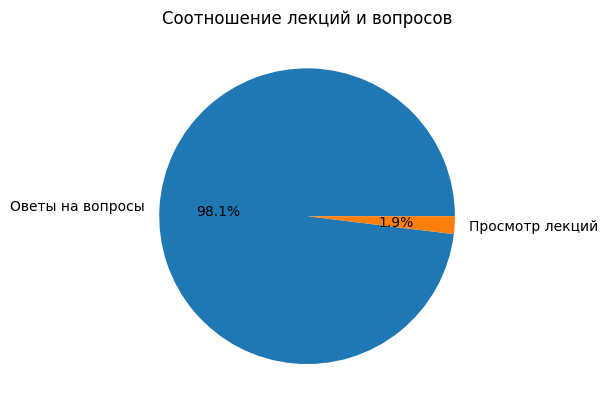

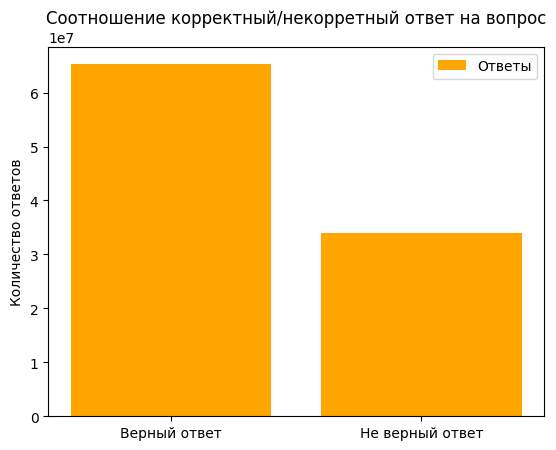

In [63]:
# Уникальные пользователи
print(f'Количество студентов {train_file.user_id.nunique()}')
print()

# Соотношение лекций и вопросов
content_types = train_file['content_type_id'].value_counts(normalize=True)
plt.pie(content_types, labels=["Оветы на вопросы", "Просмотр лекций"], autopct='%1.1f%%')
plt.title("Соотношение лекций и вопросов")
plt.show()

# Соотношение правлиных и не правильных ответов
ans = ['Верный ответ', 'Не верный ответ']
nums = [int(train_file.answered_correctly.value_counts()[1]), int(train_file.answered_correctly.value_counts()[0])]
plt.bar(ans, nums, label='Ответы', color = 'orange')
plt.ylabel('Количество ответов')
plt.title('Соотношение корректный/некорретный ответ на вопрос')
plt.legend()
plt.show()


***Файл lectures.csv***

In [4]:
lectures_file = pd.read_csv('data/lectures.csv', sep=',')
lectures_file.info()
display(lectures_file.describe())
display(lectures_file.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 13.2+ KB


,lecture_id,tag,part
count,418.000000,418.000000,418.000000
mean,16983.401914,94.480861,4.267943
std,9426.164660,53.586487,1.872424
min,89.000000,0.000000,1.000000
25%,9026.250000,50.250000,2.000000
50%,17161.500000,94.500000,5.000000
75%,24906.250000,140.000000,6.000000
max,32736.000000,187.000000,7.000000


,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question



Проводим первичный анализ

>Количество частей лекций и распределение по частям

>Количество типов лекций и распределение по типам

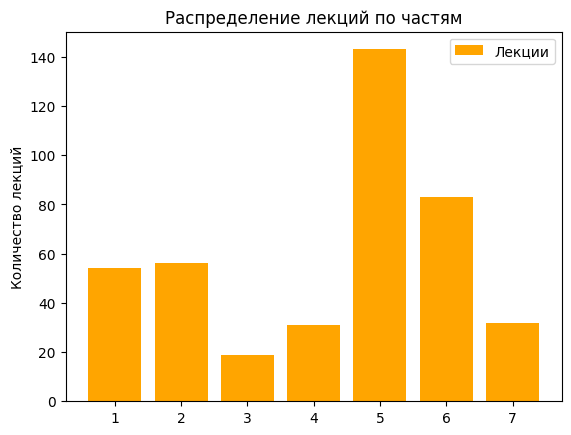

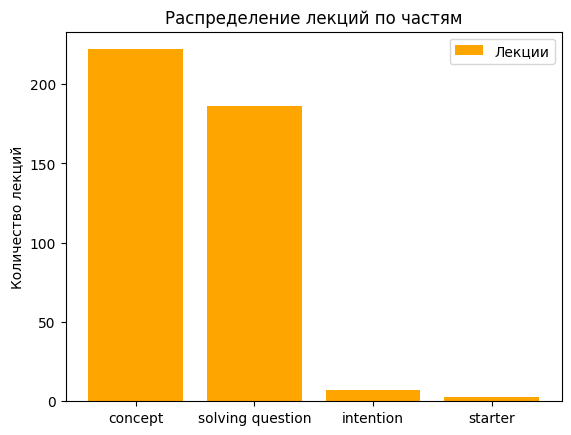

In [48]:
# количество лекций
nums = lectures_file.part.value_counts()
ans = lectures_file.part.value_counts().index
plt.bar(ans, nums, label='Лекции', color = 'orange')
plt.ylabel('Количество лекций')
plt.title('Распределение лекций по частям')
plt.legend()
plt.show()

# типы лекций
nums = lectures_file.type_of.value_counts()
ans = lectures_file.type_of.value_counts().index
plt.bar(ans, nums, label='Лекции', color = 'orange')
plt.ylabel('Количество лекций')
plt.title('Распределение лекций по частям')
plt.legend()
plt.show()


***Файл questions.csv***

In [52]:
questions_file = pd.read_csv('data/questions.csv', sep=',')
questions_file.info()
display(questions_file.describe())
display(questions_file.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB


,question_id,bundle_id,correct_answer,part
count,13523.00000,13523.000000,13523.000000,13523.000000
mean,6761.00000,6760.510907,1.455298,4.264956
std,3903.89818,3903.857783,1.149707,1.652553
min,0.00000,0.000000,0.000000,1.000000
25%,3380.50000,3379.500000,0.000000,3.000000
50%,6761.00000,6761.000000,1.000000,5.000000
75%,10141.50000,10140.000000,3.000000,5.000000
max,13522.00000,13522.000000,3.000000,7.000000


,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38



Проводим первичный анализ

>Количество частей вопросов и распределение по частям

>Количество корректрых ответов на вопросы

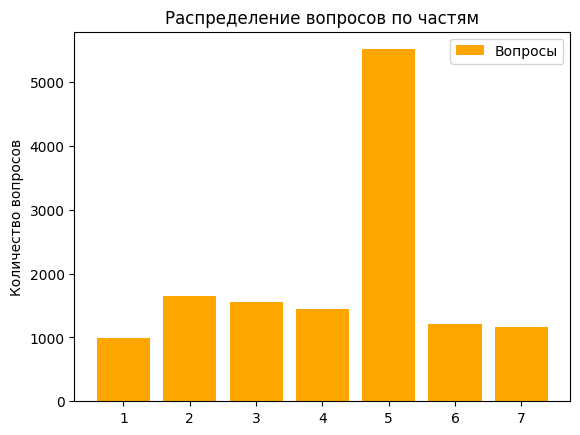

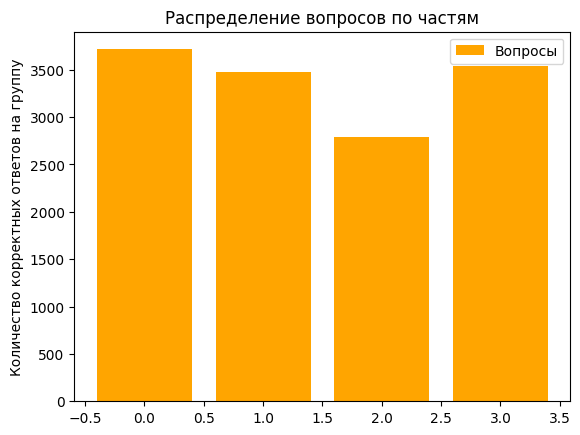

In [59]:
# количество и части вопросов
nums = questions_file.part.value_counts()
ans = questions_file.part.value_counts().index
plt.bar(ans, nums, label='Вопросы', color = 'orange')
plt.ylabel('Количество вопросов')
plt.title('Распределение вопросов по частям')
plt.legend()
plt.show()

# количество корректных ответов на вопросы
nums = questions_file.correct_answer.value_counts()
ans = questions_file.correct_answer.value_counts().index
plt.bar(ans, nums, label='Вопросы', color = 'orange')
plt.ylabel('Количество корректных ответов на группу')
plt.title('Распределение вопросов по частям')
plt.legend()
plt.show()


***Анализ данных***


Проводим первичный анализ

>Количество корректрых ответов на вопросы по частям

answered_correctly
1    74.503238
0    25.496762
Name: proportion, dtype: float64

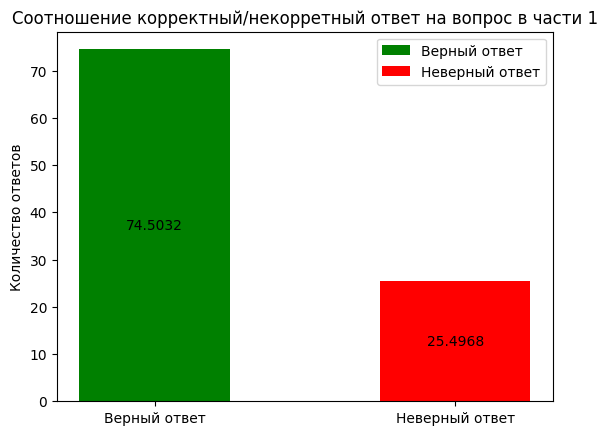

answered_correctly
1    70.869406
0    29.130594
Name: proportion, dtype: float64

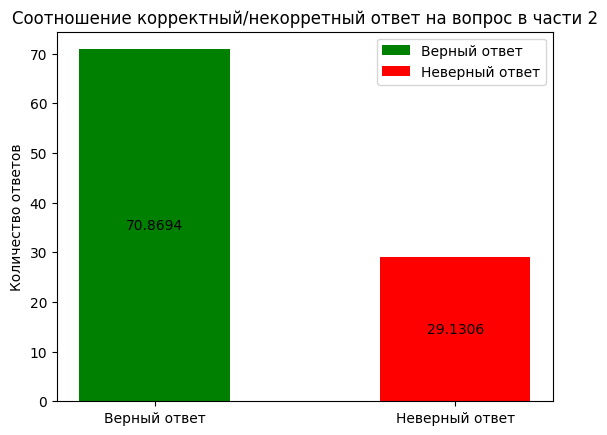

answered_correctly
1    70.145593
0    29.854407
Name: proportion, dtype: float64

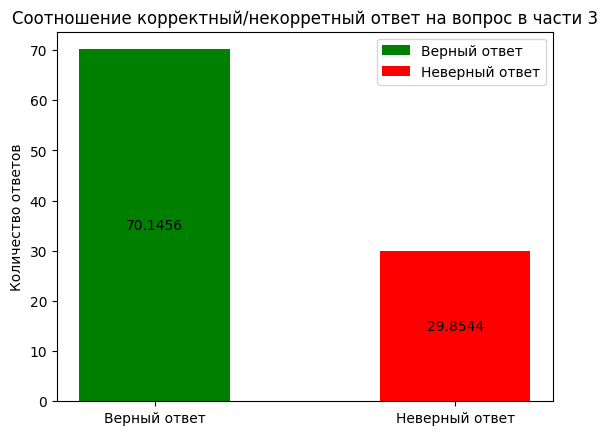

answered_correctly
1    63.099758
0    36.900242
Name: proportion, dtype: float64

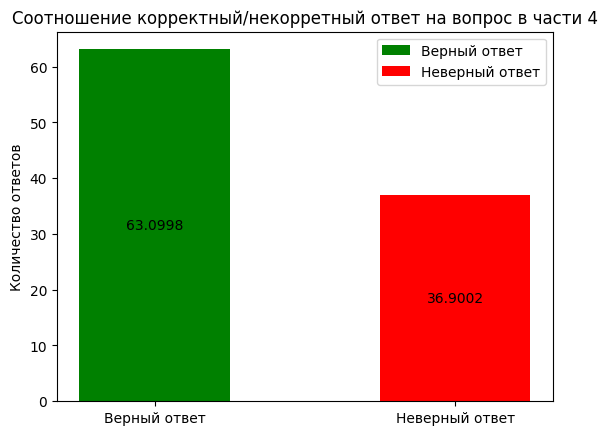

answered_correctly
1    61.008792
0    38.991208
Name: proportion, dtype: float64

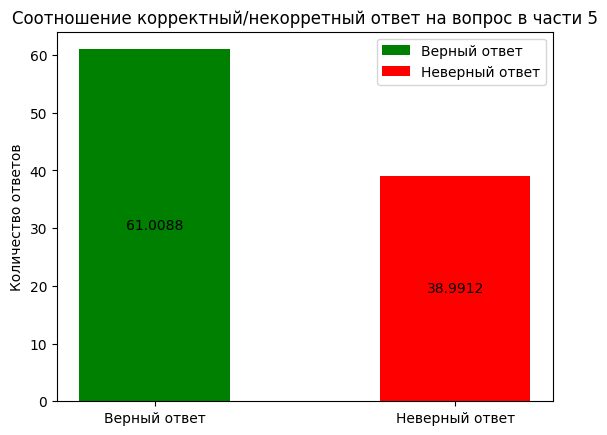

answered_correctly
1    66.938835
0    33.061165
Name: proportion, dtype: float64

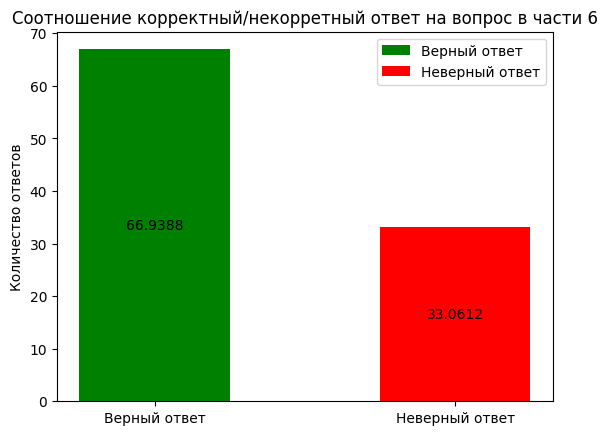

answered_correctly
1    65.960112
0    34.039888
Name: proportion, dtype: float64

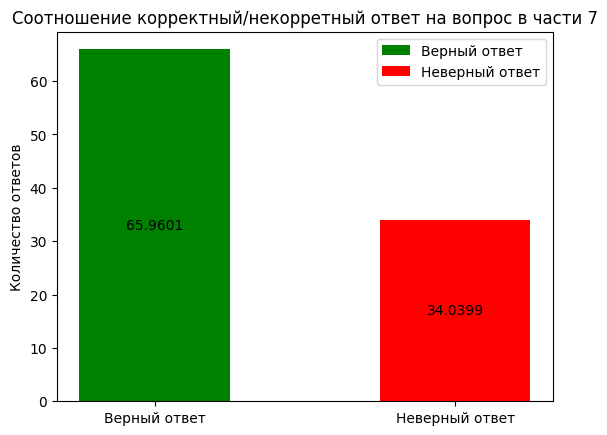

In [110]:
dct_with_answers = defaultdict()
# content_type_id принадлежит вопросам
mask_content_type_id = (train_file["content_type_id"] == 0)
# answered_correctly не принадлежит лекциям
mask_answered_correctly = (train_file["answered_correctly"] != -1)
for n_part in range(1, 8):
    # id только вопросов с необходимой части - part
    mask_questions_part = questions_file[questions_file["part"] == n_part]['question_id']
    # вхождение только тех content_id которые относятся к нужной части
    mask_content_id_in_qst = (train_file["content_id"].isin(mask_questions_part))
    # получение корректных ответов
    correct_answers = train_file[mask_content_type_id & mask_answered_correctly & mask_content_id_in_qst]
    normalized_correct_answers = correct_answers.answered_correctly.value_counts(normalize=True) * 100
    
    display(normalized_correct_answers)

    # построение графиков
    ans = ['Верный ответ', 'Неверный ответ']
    
    plt.bar_label(plt.bar(ans,
            normalized_correct_answers,
            label=ans,
            color = ['green', 'red'],
            width=0.5), label_type='center')
    plt.ylabel('Количество ответов')
    plt.title(f'Соотношение корректный/некорретный ответ на вопрос в части {n_part}')
    plt.legend()
    plt.show()